# Basic statistics


### descriptive  Analytics for Numerical columns


In [ ]:
import pandas as pd

df = pd.read_csv('/content/sales_data_with_discounts.csv')

display(df.head())

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
print("Numerical columns:", numerical_cols)

Numerical columns: ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']


### Interpretation of Descriptive Statistics

Based on the descriptive statistics calculated:

* **phd:** The average number of PhD years is approximately 19.7, with a wide range from 1 to 56. The median is close to the mean, suggesting a relatively symmetrical distribution, although the mode is lower (4), indicating a peak in the data at that value. The standard deviation of about 12.5 shows a considerable spread in the data.
* **service:** The average years of service is around 15.1, ranging from 0 to 51 years. Similar to 'phd', the median is close to the mean, but the mode is 3, indicating a concentration of individuals with fewer years of service. The standard deviation of about 12.1 suggests a significant variation in service years.
* **salary:** The average salary is approximately $108,024, with a range from $57,800 to $186,960. The median salary ($104,671) is slightly lower than the mean, which could suggest a slight skew towards higher salaries. The mode ($92,000) indicates the most frequent salary value. The standard deviation of about $28,294 shows a considerable dispersion in salaries.

Overall, the data shows variability in all three numerical columns. The skewness values previously calculated (phd: 0.63, service: 0.91, salary: 0.45) suggest a slight positive skew for all, meaning there are more data points on the lower end with a tail extending to the higher values. The boxplots also visually support the distribution and the presence of potential outliers, although the Z-score analysis didn't identify any outliers beyond 3 standard deviations.

In [ ]:

# Calculate descriptive statistics for numerical columns
descriptive_stats = df[numerical_cols].describe()

# Calculate the mode separately as describe() doesn't include it for all columns
mode_stats = df[numerical_cols].mode().iloc[0] # .iloc[0] to handle cases with multiple modes

# Combine the results
descriptive_stats.loc['mode'] = mode_stats

display(descriptive_stats)

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049
mode,3.000000,400.000000,24300.000000,5.007822,69.177942,326.974801


In [ ]:
import numpy as np

# Identify potential outliers using Z-score
outliers = {}
for col in numerical_cols:
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
    outliers[col] = df[col][z_scores > 3]

print("Potential outliers (Z-score > 3):")
for col, outlier_values in outliers.items():
    print(f"{col}: {outlier_values.tolist()}")

Potential outliers (Z-score > 3):
Volume: [29, 24, 25, 22, 31, 24, 22, 29]
Avg Price: []
Total Sales Value: [196400]
Discount Rate (%): []
Discount Amount: [21153.49881959317, 17900.983733131387, 17445.603828100593, 16892.520950977458, 17178.331859479713, 17696.813620554134, 25328.224204195907, 25738.02219375868, 21496.67536736378]
Net Sales Value: [179507.47904902254]


# Data visualization


### Histograms

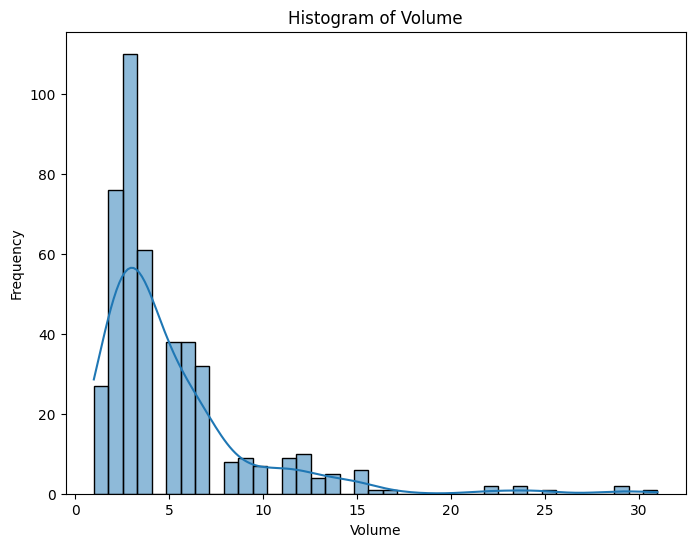

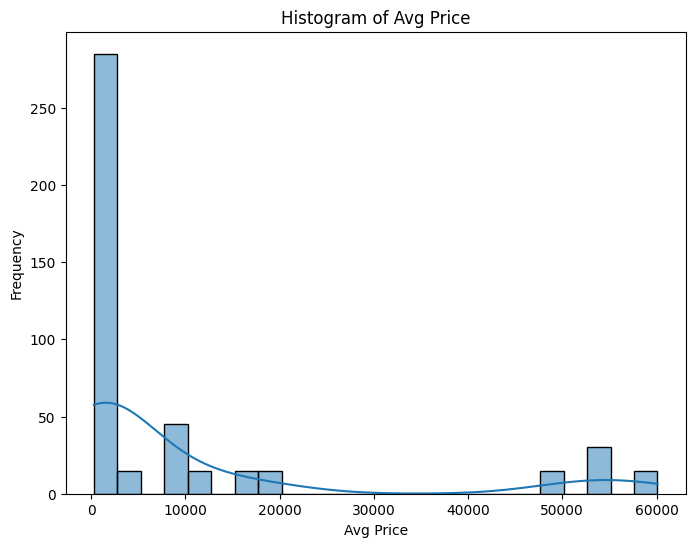

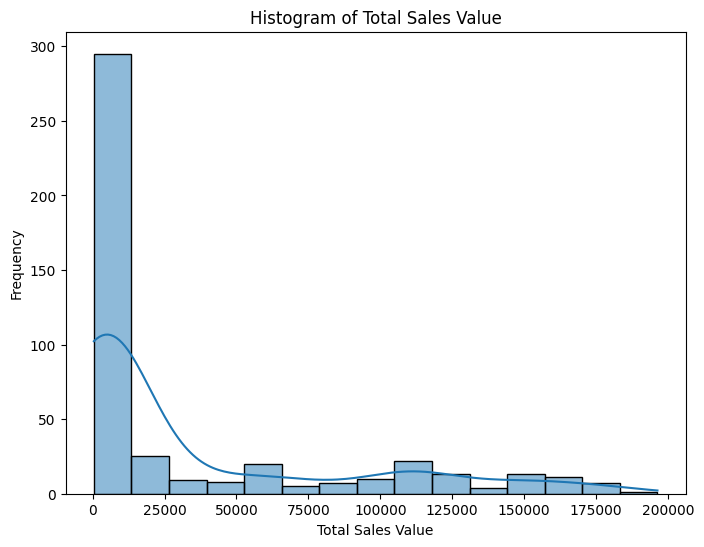

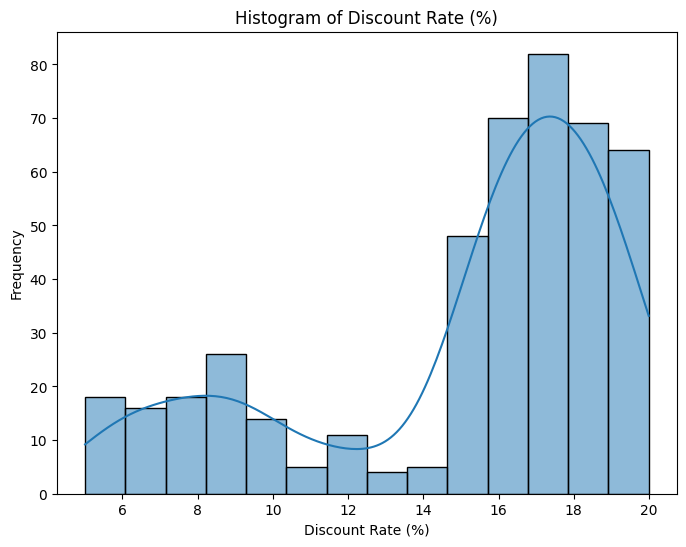

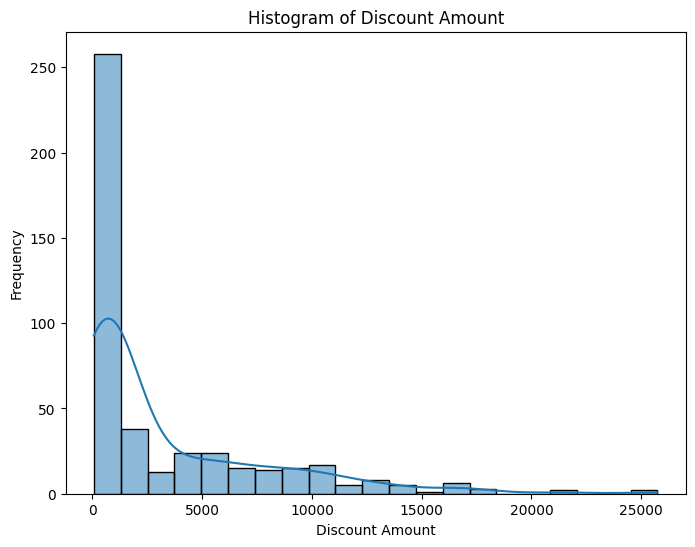

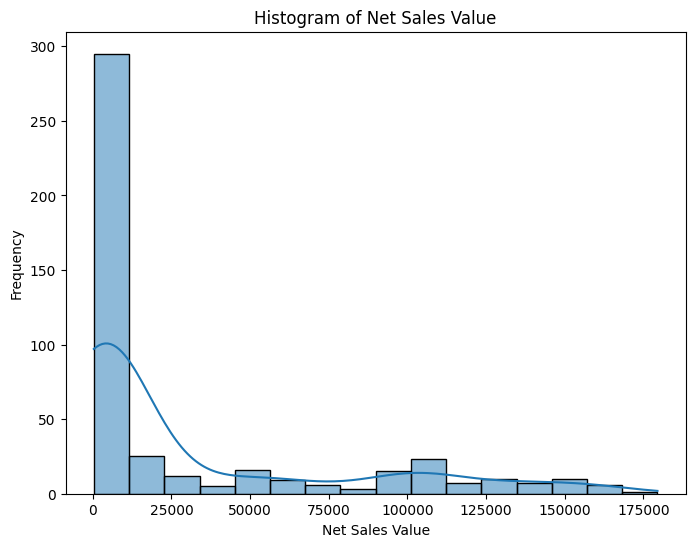

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Plot histograms for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Calculate skewness for numerical columns
skewness = df[numerical_cols].skew()
print("Skewness of numerical columns:")
print(skewness)

Skewness of numerical columns:
Volume               2.731724
Avg Price            1.908873
Total Sales Value    1.534729
Discount Rate (%)   -1.062294
Discount Amount      1.913038
Net Sales Value      1.540822
dtype: float64


### Boxplots

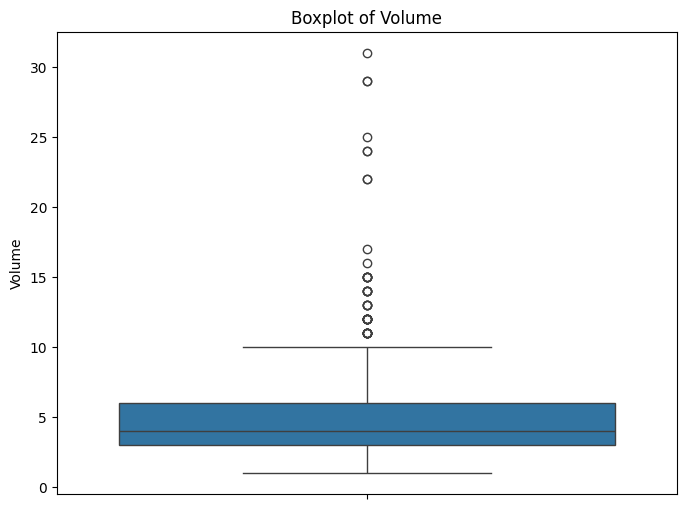

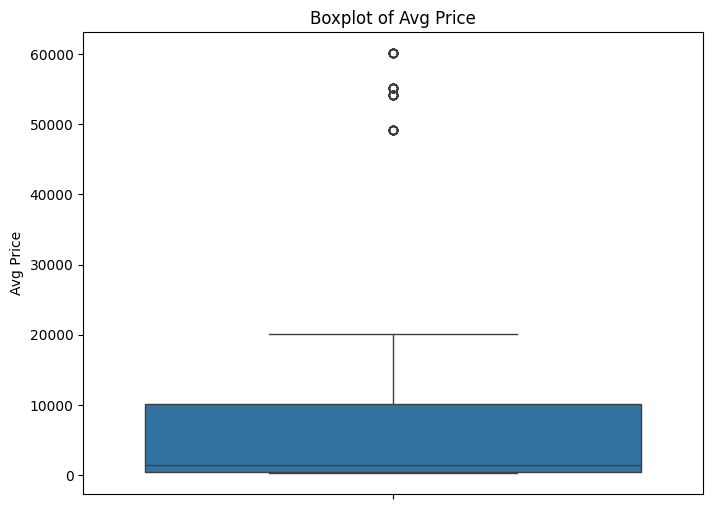

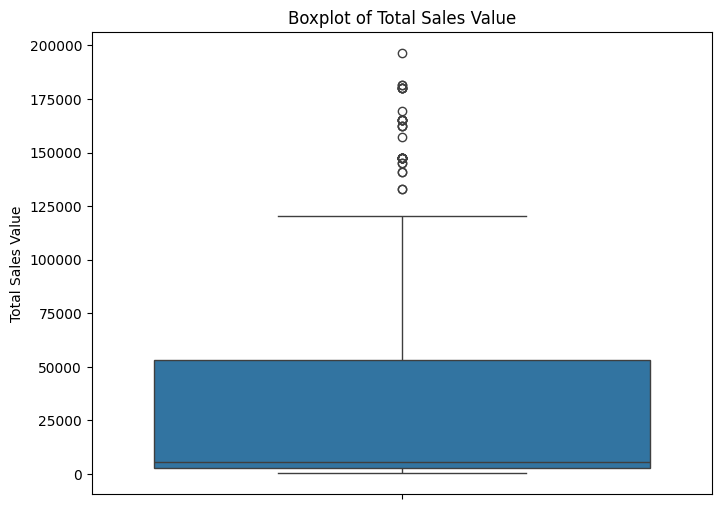

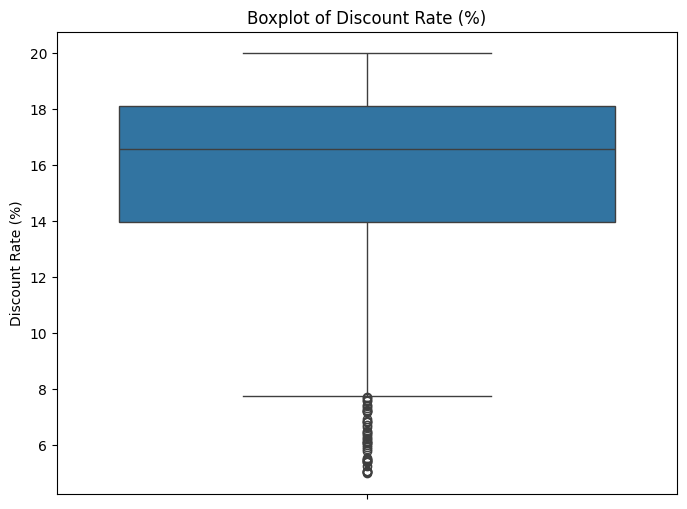

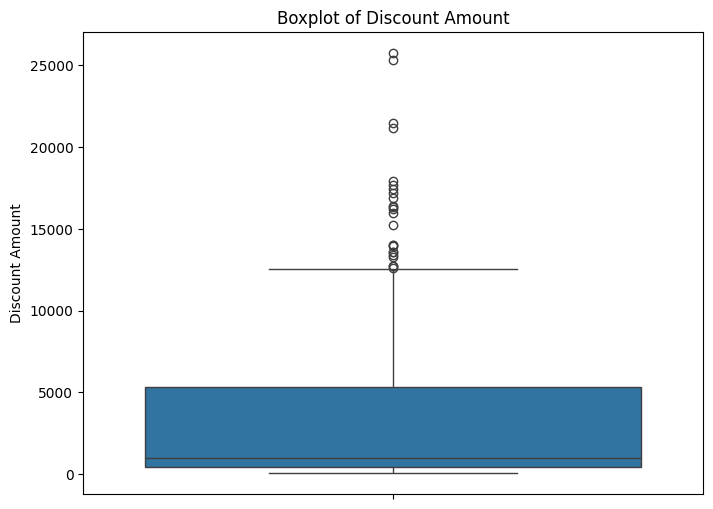

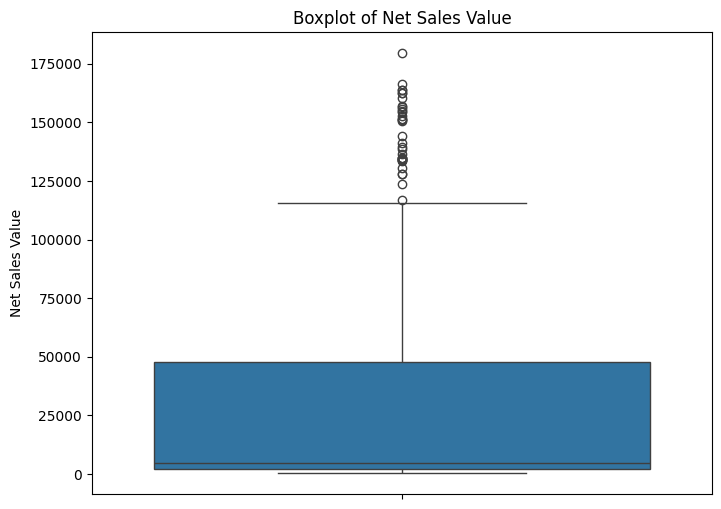

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplots for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

In [ ]:
# Example of filtering out potential outliers based on Z-score > 3
df_filtered = df.copy()
for col in numerical_cols:
    z_scores = np.abs((df_filtered[col] - df_filtered[col].mean()) / df_filtered[col].std())
    df_filtered = df_filtered[z_scores <= 3]

print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", df_filtered.shape)
display(df_filtered.head())

Original DataFrame shape: (450, 13)
Filtered DataFrame shape: (430, 13)


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
5,01-04-2021,Thursday,M06,C,3,Mobiles,RealU,RU-9,8100,24300,16.996489,4130.146805,20169.853195


### Bar Chart Analysis for Categorical Column

In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical columns:", categorical_cols)

Categorical columns: ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


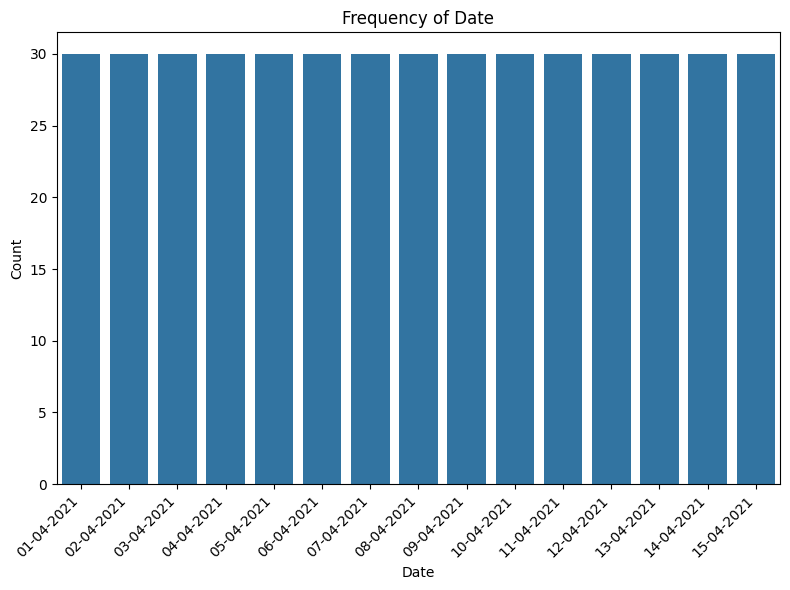

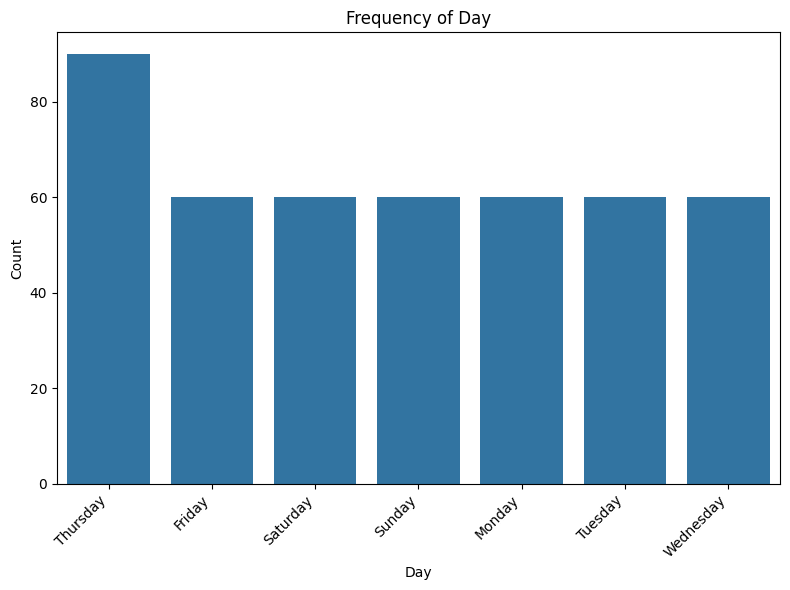

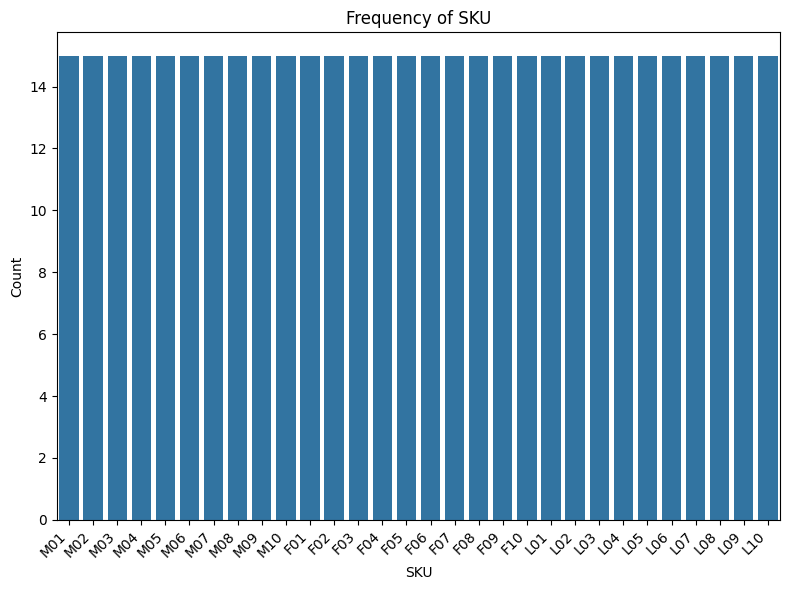

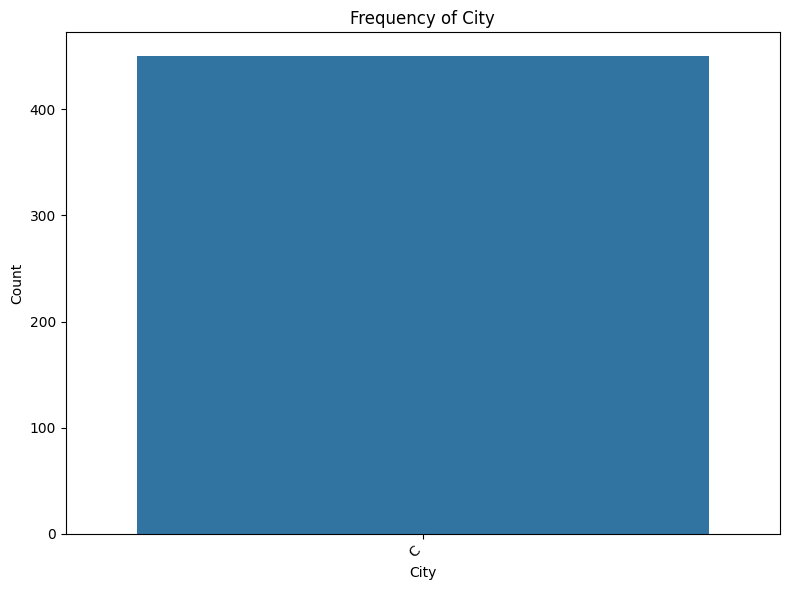

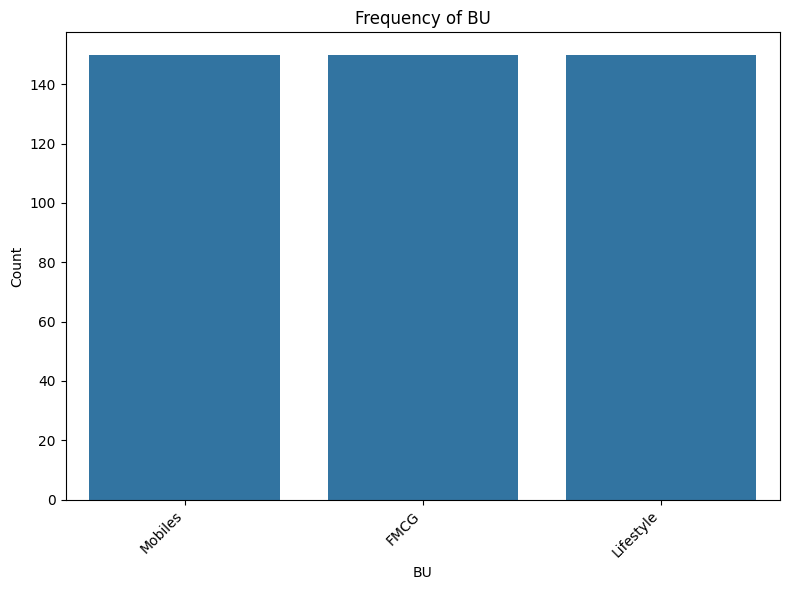

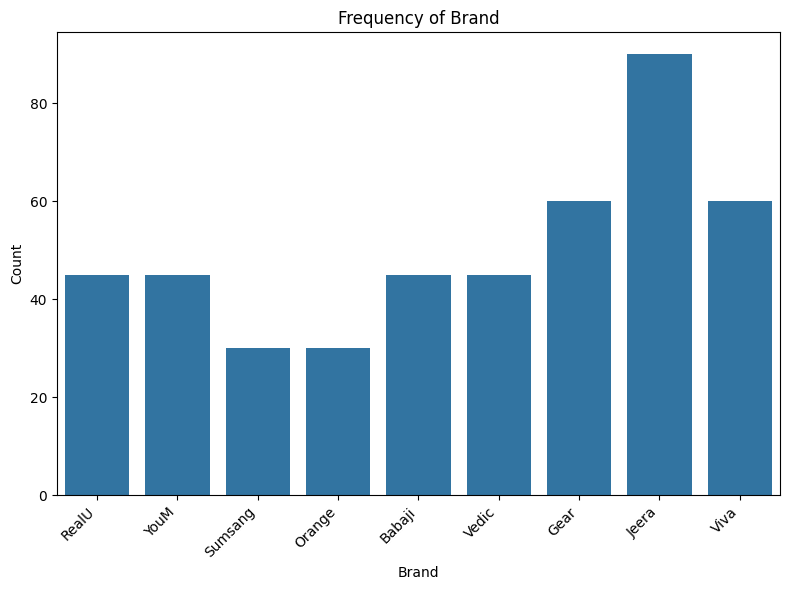

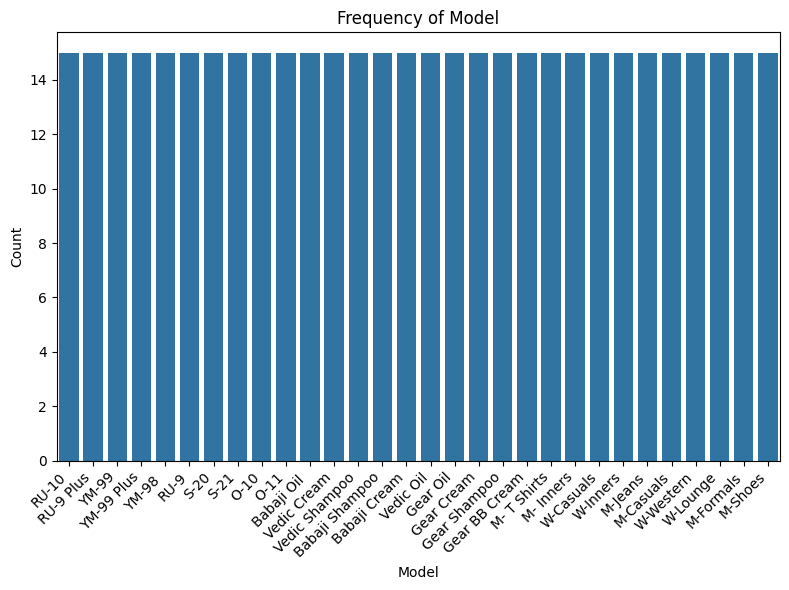

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create bar charts for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')                            # Rotate labels for better readability if needed
    plt.tight_layout()                                              # Adjust layout to prevent labels overlapping
    plt.show()

In [ ]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = df[numerical_cols].corr()

print("Correlation Matrix:")
display(correlation_matrix)

Correlation Matrix:


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
Volume,1.000000,-0.250878,-0.034789,0.157972,0.066297,-0.044373
Avg Price,-0.250878,1.000000,0.831978,-0.831582,0.676007,0.841166
Total Sales Value,-0.034789,0.831978,1.000000,-0.835431,0.932410,0.999382
Discount Rate (%),0.157972,-0.831582,-0.835431,1.000000,-0.657607,-0.846720
Discount Amount,0.066297,0.676007,0.932410,-0.657607,1.000000,0.919127
Net Sales Value,-0.044373,0.841166,0.999382,-0.846720,0.919127,1.000000


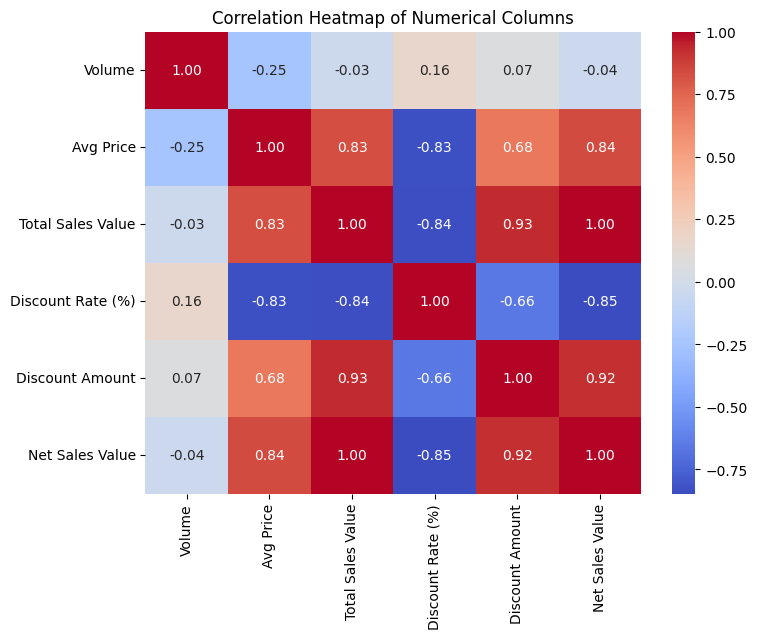

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

### standardization of numerical variables

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the numerical data and transform it
df_scaled = df.copy() # Create a copy to avoid modifying the original DataFrame
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

print("Original DataFrame head:")
display(df.head())

print("\nStandardized DataFrame head:")
display(df_scaled.head())

Original DataFrame head:


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770



Standardized DataFrame head:


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,2.350029,Mobiles,RealU,RU-10,0.091173,2.925721,-0.830289,3.952816,2.804756
1,01-04-2021,Thursday,M02,C,1.167129,Mobiles,RealU,RU-9 Plus,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,01-04-2021,Thursday,M03,C,0.457388,Mobiles,YouM,YM-99,0.312659,1.562775,-1.351631,1.622995,1.545675
3,01-04-2021,Thursday,M04,C,0.220808,Mobiles,YouM,YM-99 Plus,0.534146,1.719276,-1.949723,1.113807,1.765810
4,01-04-2021,Thursday,M05,C,-0.488932,Mobiles,YouM,YM-98,-0.130313,-0.188452,0.673739,0.227852,-0.227595


In [ ]:
display(df_scaled)

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,2.350029,Mobiles,RealU,RU-10,0.091173,2.925721,-0.830289,3.952816,2.804756
1,01-04-2021,Thursday,M02,C,1.167129,Mobiles,RealU,RU-9 Plus,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,01-04-2021,Thursday,M03,C,0.457388,Mobiles,YouM,YM-99,0.312659,1.562775,-1.351631,1.622995,1.545675
3,01-04-2021,Thursday,M04,C,0.220808,Mobiles,YouM,YM-99 Plus,0.534146,1.719276,-1.949723,1.113807,1.765810
4,01-04-2021,Thursday,M05,C,-0.488932,Mobiles,YouM,YM-98,-0.130313,-0.188452,0.673739,0.227852,-0.227595
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,-0.725512,Lifestyle,Jeera,M-Casuals,-0.506840,-0.618334,0.076009,-0.653541,-0.610461
446,15-04-2021,Thursday,L07,C,0.220808,Lifestyle,Viva,W-Western,-0.434857,-0.360801,0.451097,-0.152191,-0.378500
447,15-04-2021,Thursday,L08,C,-0.725512,Lifestyle,Viva,W-Lounge,-0.490229,-0.606448,0.903793,-0.608140,-0.601921
448,15-04-2021,Thursday,L09,C,-0.488932,Lifestyle,Jeera,M-Formals,-0.473617,-0.556923,0.388474,-0.530379,-0.555499


#### conversion of categorical data in to dummy variables

In [ ]:
# Convert categorical columns into dummy variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)              # drop_first=True to avoid multicollinearity

print("Original DataFrame head:")
display(df.head())

print("\nDataFrame with Dummy Variables head:")
display(df_encoded.head())

Original DataFrame head:


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770



DataFrame with Dummy Variables head:


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
display(df_encoded)

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
446,6,2600,15600,17.057027,2660.896242,12939.103758,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
447,2,1600,3200,18.965550,606.897606,2593.102394,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
448,3,1900,5700,16.793014,957.201826,4742.798174,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### conclusion




Based on the descriptive analytics and data visualizations, here are the key findings:

* **Numerical Data:** The numerical columns (phd, service, and salary) show variability, with slight positive skewness. Histograms and boxplots visually support these distributions and indicate potential outliers, although the Z-score analysis didn't identify any beyond 3 standard deviations.
* **Categorical Data:** The bar charts show the frequency distribution for the categorical columns (rank, discipline, and sex). There is a higher count of "Prof" in the 'rank' column, and the counts for 'discipline' and 'sex' are relatively balanced.
* **Correlations:** The correlation heatmap reveals a strong positive correlation between 'phd' and 'service' (0.93), and moderate positive correlations between 'phd' and 'salary' (0.58), and 'service' and 'salary' (0.53). This suggests that as years of experience (phd and service) increase, salary tends to increase as well.
* **Data Processing:** The numerical variables have been standardized using StandardScaler, and the categorical variables have been converted into dummy variables. The processed data has been saved to a new CSV file.

In [ ]:
# Identify original numerical and categorical columns to drop
original_cols_to_drop = numerical_cols + categorical_cols

# Create the final processed DataFrame by dropping original columns and concatenating processed ones
df_processed = df.drop(columns=original_cols_to_drop).copy()

# Concatenate standardized numerical columns and dummy variables
df_processed = pd.concat([df_processed, df_scaled[numerical_cols], df_encoded[df_encoded.columns.difference(df.columns)]], axis=1)

print("Processed DataFrame head:")
display(df_processed.head())

Processed DataFrame head:


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,BU_Lifestyle,BU_Mobiles,Brand_Gear,Brand_Jeera,...,SKU_M01,SKU_M02,SKU_M03,SKU_M04,SKU_M05,SKU_M06,SKU_M07,SKU_M08,SKU_M09,SKU_M10
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


### Importance of Data Preprocessing
Data preprocessing steps such as standardization and one-hot encoding are crucial in data analysis and machine learning for several reasons:

Standardization: Many machine learning algorithms are sensitive to the scale of the input features. Standardization (scaling data to have zero mean and unit variance) ensures that all features contribute equally to the model's performance and prevents features with larger values from dominating those with smaller values. This is particularly important for algorithms that rely on distance calculations, like K-Nearest Neighbors, or those that use gradient descent, like neural networks.

One-Hot Encoding: Machine learning models typically require numerical input. One-hot encoding converts categorical variables into a numerical format that can be understood by these models. It creates new binary columns for each category in the original feature, preventing the model from assuming an ordinal relationship between categories where none exists. This is essential for accurately representing categorical data in the model.

In summary, preprocessing steps like standardization and one-hot encoding are vital for preparing data for machine learning models, leading to improved model performance, stability, and interpretability.



In [ ]:
# Save the processed DataFrame to a new CSV file
df_processed.to_csv('processed_data.csv', index=False)

print("Processed data saved to 'processed_data.csv'")

Processed data saved to 'processed_data.csv'
